In [1]:
import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


Here we are analysing how long the GPU takes to create this random zero valued torch across 1000 x 1000 matrix

In [2]:
import numpy as np
import time
import torch.nn as nn
from torch.nn import functional as F

In [16]:
start_time = time.time()

#matrix operations here
zeros = torch.zeros(1000,1000)
end_time = time.time()

elapsed_time = end_time - start_time
print(f"{elapsed_time: .10f}")

 0.0010025501


In [15]:
print(zeros)

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


Here we are comparing the performace of Numpy CPU vs Torch GPU

In [17]:
torch_rand1 =  torch.rand(10000,10000).to(device)
torch_rand2 =  torch.rand(10000,10000).to(device)
np_rand1 = torch.rand(10000,10000)
np_rand2 = torch.rand(10000,10000)

start_time = time.time()

randT = (torch_rand1 @ torch_rand2)

end_time = time.time()

elapsed_time = end_time - start_time
print(f"{elapsed_time: .8f}")


start_time = time.time()

randN = np.multiply(np_rand1,np_rand2)

end_time = time.time()

elapsed_time = end_time - start_time
print(f"{elapsed_time: .8f}")

 0.11052132
 0.06918025


C:\Users\harid\AppData\Local\Temp\ipykernel_15096\2410692463.py:18: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  randN = np.multiply(np_rand1,np_rand2)


Now for a simple 2 x 2 matrix, the CPU beats the GPU, but if the case is slightly different like...

In [21]:
torch_rand1 =  torch.rand(200,200,200,200).to(device)
torch_rand2 =  torch.rand(200,200,200,200).to(device)
np_rand1 = torch.rand(200,200,200,200)
np_rand2 = torch.rand(200,200,200,200)

start_time = time.time()

randT = (torch_rand1 @ torch_rand2)

end_time = time.time()

elapsed_time = end_time - start_time
print(f"GPU time taken :{elapsed_time: .8f}")


start_time = time.time()

randN = np.multiply(np_rand1,np_rand2)

end_time = time.time()

elapsed_time = end_time - start_time
print(f"CPU time taken :{elapsed_time: .8f}")

OutOfMemoryError: CUDA out of memory. Tried to allocate 5.96 GiB. GPU 0 has a total capacity of 6.00 GiB of which 0 bytes is free. Of the allocated memory 6.71 GiB is allocated by PyTorch, and 11.88 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

Well this was to show the limitation of my GPU and learn a little about it, you can also try absurd methods like this. It took well over 20 seconds to print this by the way

In [22]:
torch_rand1 =  torch.rand(110,110,110,110).to(device)
torch_rand2 =  torch.rand(110,110,110,110).to(device)
np_rand1 = torch.rand(110,110,110,110)
np_rand2 = torch.rand(110,110,110,110)

start_time = time.time()

randT = (torch_rand1 @ torch_rand2)

end_time = time.time()

elapsed_time = end_time - start_time
print(f"GPU time taken :{elapsed_time: .8f}")


start_time = time.time()

randN = np.multiply(np_rand1,np_rand2)

end_time = time.time()

elapsed_time = end_time - start_time
print(f"CPU time taken :{elapsed_time: .8f}")

GPU time taken : 0.02585101
CPU time taken : 0.12843204


C:\Users\harid\AppData\Local\Temp\ipykernel_15096\4197572064.py:18: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  randN = np.multiply(np_rand1,np_rand2)


Now in the above case the GPU was much faster than the CPU

In [2]:
import torch.nn as nn
sample = torch.tensor([10.,10.,10.])
linear = nn.Linear(3,3,bias=False)
print(linear(sample))

tensor([ 0.3034, -7.6342,  2.7100], grad_fn=<SqueezeBackward4>)


In [3]:
import torch.nn.functional as f

tensor1 = torch.tensor([1.0,2.0,3.0])
softmax_output =  f.softmax(tensor1,dim=0)
print(softmax_output)

tensor([0.0900, 0.2447, 0.6652])


Matrix Multiplication in torch, 2 methods

In [4]:
a = torch.tensor([[1,2],[3,4],[5,6]])
b = torch.tensor([[7,8,9],[10,11,12]])
print(a @ b)
print(torch.matmul(a,b))

tensor([[ 27,  30,  33],
        [ 61,  68,  75],
        [ 95, 106, 117]])
tensor([[ 27,  30,  33],
        [ 61,  68,  75],
        [ 95, 106, 117]])


NOTE: Matrix multiplication does not work with int x float.
We need float x float or int x int.
So if we are to work with an int x float situation we must cast the int as a float.
The below example will show us a good idea 

In [6]:
int_64 = torch.randint(1,(3,2))
float_32 = torch.rand(2,3)

print(int_64.dtype, float_32.dtype)

torch.int64 torch.float32


In [7]:
result = torch.matmul(int_64,float_32)
print(result)

RuntimeError: expected m1 and m2 to have the same dtype, but got: __int64 != float

Now we apply float() casting for int_32

In [8]:
int_64 = torch.randint(1,(3,2)).float()
float_32 = torch.rand(2,3)
print(int_64 @ float_32)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])


Softmax working:


Exponentiate, Normalize

In [4]:
a = torch.rand(2,3,5)
print(a.shape)
x, y, z = a.shape
a = a.view(x,y,z)
print(x,y,z)
print(a.shape)

torch.Size([2, 3, 5])
2 3 5
torch.Size([2, 3, 5])


***Activation functions:*** 

Changing non linear inputs. 


Say we got bunch of linear layers, nn.Linear() can squeeze together which can use one transformation on all of those. Say we have 100 of these nn.Linear() layers doing the sample multiplication 100 times using computation (we will use activation functions to minimise this probably)

In [3]:
x = torch.tensor([-0.05], dtype=torch.float32)
y = nn.ReLU(x)
print(y)

ReLU(inplace=True)


Well pretty much this didnt work but, The ReLU function changes values of less than 0 to 0 and the postive answers are not affected by this function.


This also lets the neural network to learn linearity and non linearity.

In [3]:
x = torch.tensor([-0.05], dtype=torch.float32)
y = F.sigmoid(x)
print(y)

tensor([0.4875])


Sigmoid generalises over the curve 

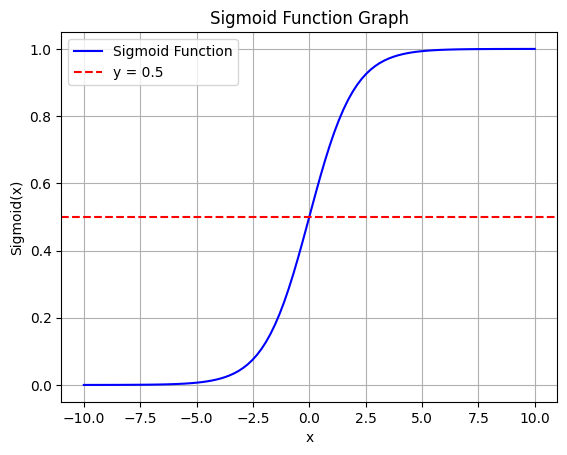

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Generate x values from -10 to 10
x = np.linspace(-10, 10, 100)

# Compute y values using the sigmoid function
y = sigmoid(x)

# Plot the sigmoid function
plt.plot(x, y, label="Sigmoid Function", color="blue")
plt.axhline(y=0.5, color="red", linestyle="--", label="y = 0.5")
plt.xlabel("x")
plt.ylabel("Sigmoid(x)")
plt.title("Sigmoid Function Graph")
plt.legend()
plt.grid()

# Show the plot
plt.show()


This is for a reference for Sigmoid function

In [5]:
x = torch.tensor([-0.05], dtype=torch.float32)
y = F.tanh(x)
print(y)

tensor([-0.0500])


In [6]:
x = torch.tensor([1], dtype=torch.float32)
y = F.tanh(x)
print(y)

tensor([0.7616])


In [7]:
x = torch.tensor([10], dtype=torch.float32)
y = F.tanh(x)
print(y)

tensor([1.])


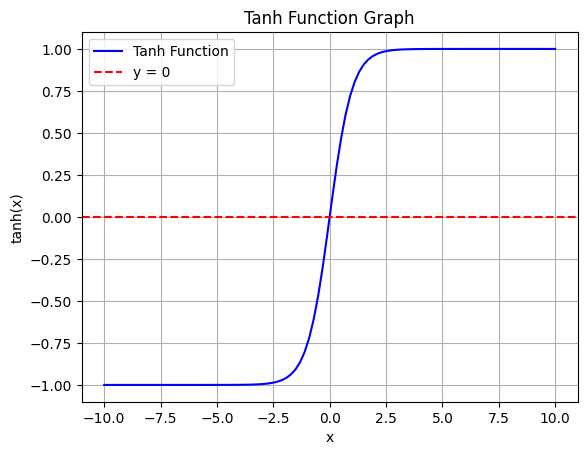

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Define the tanh function
def tanh(x):
    return np.tanh(x)

# Generate x values from -10 to 10
x = np.linspace(-10, 10, 100)

# Compute y values using the tanh function
y = tanh(x)

# Plot the tanh function
plt.plot(x, y, label="Tanh Function", color="blue")
plt.axhline(y=0, color="red", linestyle="--", label="y = 0")
plt.xlabel("x")
plt.ylabel("tanh(x)")
plt.title("Tanh Function Graph")
plt.legend()
plt.grid()

# Show the plot
plt.show()


***When would we use Tanh over sigmoid?***


**Sigmoid outputs:** Values between 0 and 1 (close to softmax, softmax prioritizes larger values first over smaller values)


**Tanh outputs:** Values between -1 and 1